In [169]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import re
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Note
# I remove value less or equal to 0 or greater than 10
# I don't think "last_z_value" in KA_HD_WIN_xx" is the correct sholaing value, So I exclude them in the following calculation
#  I replace 0 to very small value (10e-31) becasue 0 should not be included in calculating Jensen-Shannon Divergence

# Preprocess

### Combine all the data

In [170]:
import os
import glob

# use glob to get all the csv files
# in the folder
path = os.getcwd() + '/data/CELRL/'
print(path)
csv_files = glob.glob(os.path.join(path, "*.csv"))

/Users/machaolun/Desktop/shoaling/data/CELRL/


In [171]:
len(csv_files)
# there are 42 qualified files in total

86

### put data points to hist bins

In [172]:

def locate_data_to_hist(data_points):
    bin_width = 0.1
    num_bins = 100
    return np.histogram(
    data_points,
    bins=num_bins,
    range=(0, 10),
    density=True)

OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_CAN_1_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/GR_LD_GR2_7_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/GR_LD_JTM_1_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/GR_LD_GR2_10_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_MCA_6_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_JTM_4_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_MKL_2_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_SMT_16_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_JTM_13_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_OLM_1_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/GR_LD_GR1_9_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_NBG_2_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/GR_LD_GR2_8_avg_max_min.csv
OK /Users/machaolun/D

/var/folders/tg/j4sjjb0920dftqs1qb5pk9_00000gn/T/ipykernel_29172/3554661009.py:16: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  one_df = pd.read_csv(f)


OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_MCA_2_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_MCA_5_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_CAI_4_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_JTM_8_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/GR_LD_GR2_4_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/GR_LD_GR1_5_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_NBG_1_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_SMT_15_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_OLM_2_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_JTM_10_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_MKL_1_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_JTM_7_avg_max_min.csv
OK /Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_JTM_9_avg_max_min.csv
OK /Users/mac

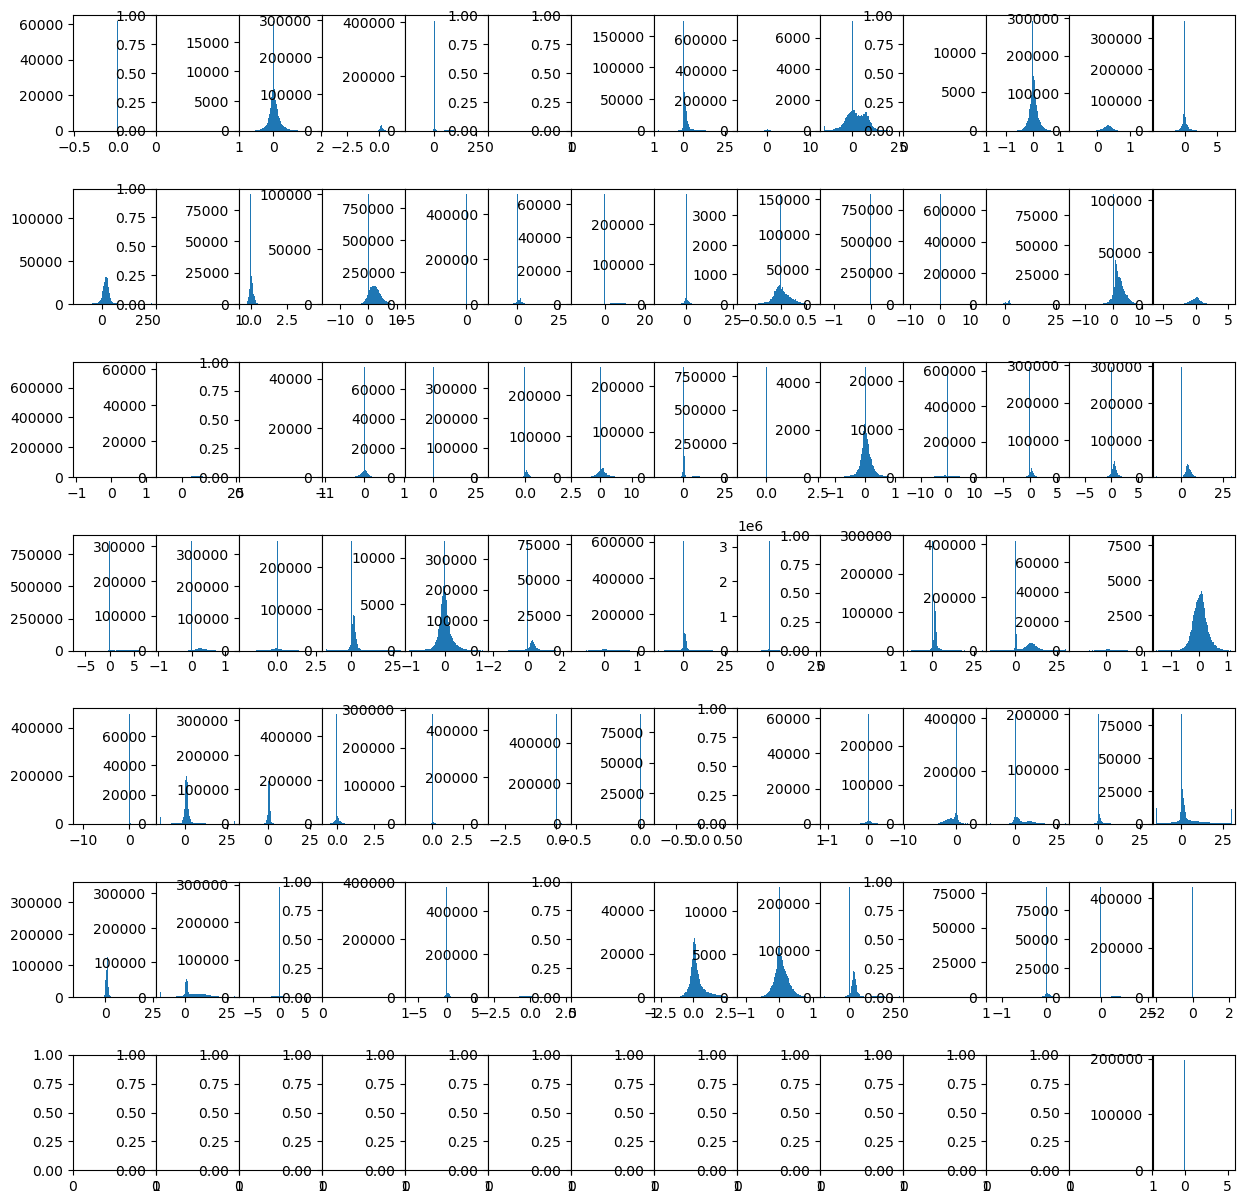

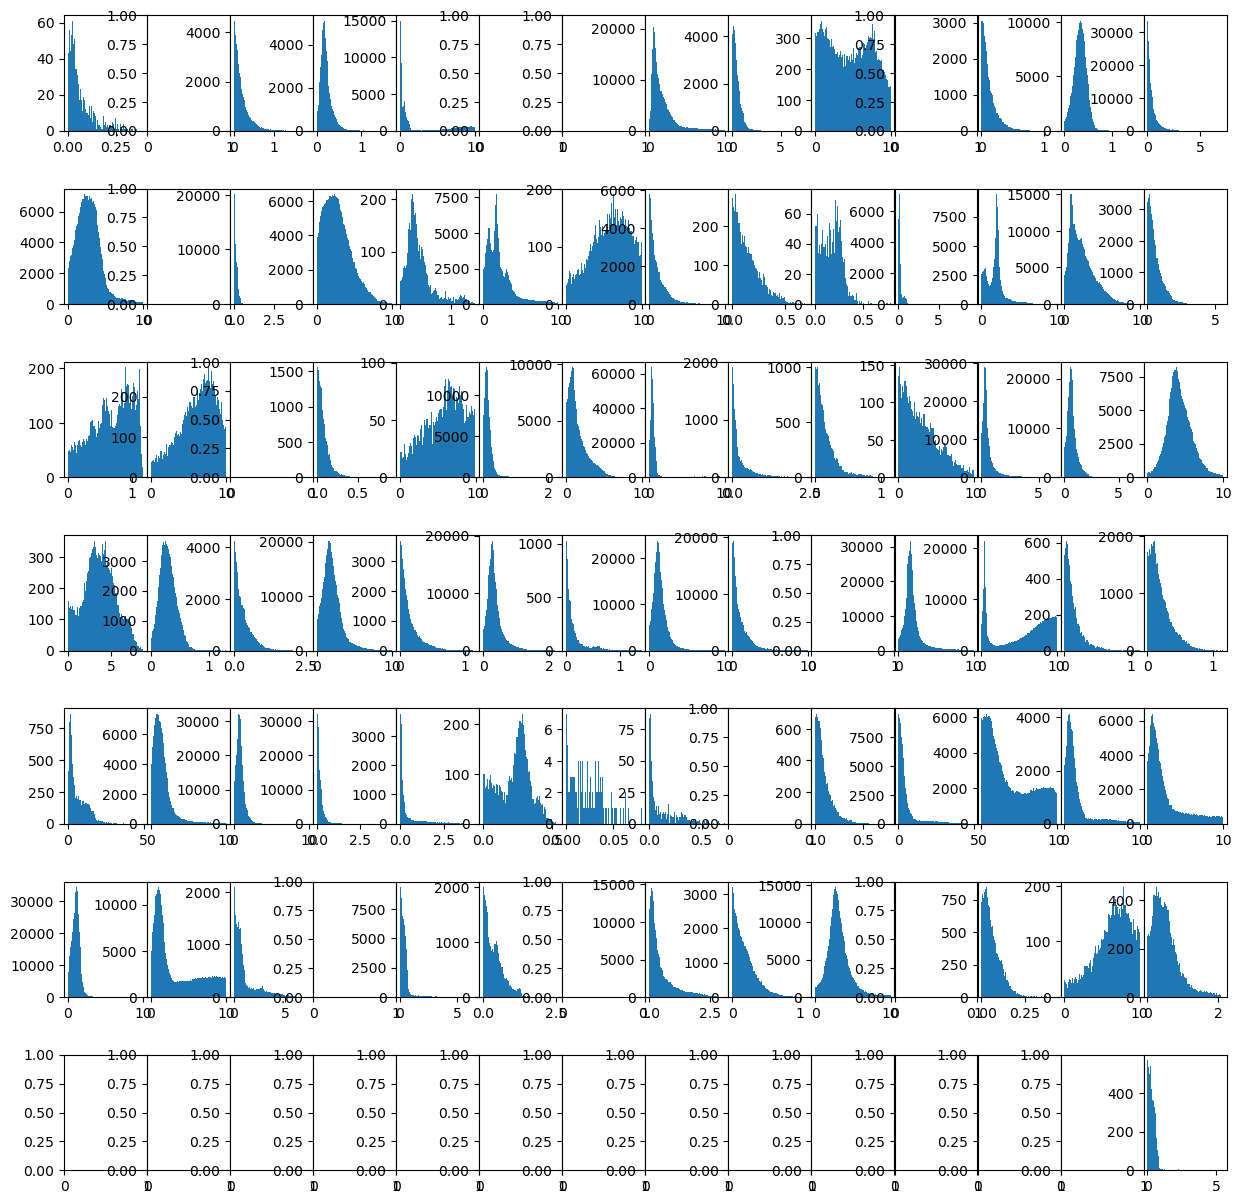

In [173]:
# notice here, the subplot size may affect the input process
# make sure the subplot size is larger than the total number of files!
fig1, axs1 = plt.subplots(7,14, figsize=(15, 15), facecolor='w', edgecolor='k')
fig1.subplots_adjust(hspace = .5, wspace=.001)
axs1 = axs1.ravel()

fig2, axs2 = plt.subplots(7,14, figsize=(15, 15), facecolor='w', edgecolor='k')
fig2.subplots_adjust(hspace = .5, wspace=.001)
axs2 = axs2.ravel()

data_df = pd.DataFrame()

# loop over the list of csv files
for i, f in enumerate(csv_files):
    # read the csv file
    one_df = pd.read_csv(f)

    # print(f, one_df.columns)
    try:
    # with 0 and negative value
        if sum(one_df['AvgRate_ftPerYr_Unfiltered']) == 0:
            print("allzero "+ f)
        else:
            axs1[i - 1].hist(one_df['AvgRate_ftPerYr_Unfiltered'], bins = 100)
            # without 0 and negative value
            pro_data = one_df[(one_df['AvgRate_ftPerYr_Unfiltered'] > 0) & (one_df['AvgRate_ftPerYr_Unfiltered'] <10)]['AvgRate_ftPerYr_Unfiltered']
            axs2[i - 1].hist(pro_data, bins = 100)
            # pro_data = one_df[(one_df['AvgRate_ftPerYr_Unfiltered'] > 0)]['AvgRate_ftPerYr_Unfiltered']
            # axs2[i - 1].hist(pro_data, bins = 100)           
            hist, edges = locate_data_to_hist(pro_data)
            subreach_name = re.split('/|_avg_max_min.csv', f)[-2]

            data_df[subreach_name] = hist
            print("OK "+f)
    except:
        print(f)
    # df_BS_GRO = df_BS_GRO.append(one_df)


In [174]:
# replace 0 with very small values
data_df.replace(0, 10e-31, inplace = True)
data_df

,OH_LD_CAN_1,GR_LD_GR2_7,GR_LD_GR2_10,OH_LD_MCA_6,OH_LD_JTM_4,OH_LD_JTM_13,OH_LD_OLM_1,GR_LD_GR1_9,GR_LD_GR2_8,OH_LD_NBG_11,...,OH_LD_SMT_13,OH_LD_JTM_1,OH_LD_NBG_7,OH_LD_OLM_10,OH_LD_NBG_8,GR_LD_GR2_2,OH_LD_SMT_9,GR_LD_GR1_3,GR_LD_GR1_12,OH_LD_CAI_2
0,1.834696e+00,7.942346e+00,4.105276e+00,1.826231e+00,2.011841,0.075071,1.320417e+00,0.121350,5.432731e+00,4.592396e-01,...,0.143646,1.113634e+00,2.011027e+00,2.104526e+00,1.909330e+00,3.746309e+00,0.035042,7.861203e+00,0.031075,7.936712e-01
1,1.680291e+00,1.411531e+00,2.490065e+00,4.174521e+00,1.246308,0.124148,1.433967e+00,0.118268,2.511295e+00,1.130311e+00,...,0.176919,9.028256e-01,1.705613e+00,1.653449e+00,1.931688e+00,2.467846e+00,0.036991,1.931108e+00,0.027968,1.060587e+00
2,1.729337e+00,5.566600e-01,1.376373e+00,2.291018e+00,0.549111,0.217693,1.382219e+00,0.123276,1.103665e+00,2.377778e+00,...,0.204512,7.876921e-01,1.506286e+00,1.061356e+00,1.341474e+00,1.728132e+00,0.040677,1.587212e-01,0.024860,1.288269e+00
3,1.220708e+00,8.946322e-02,7.601231e-01,9.461105e-01,0.439826,0.361818,1.173513e+00,0.124047,5.173193e-01,3.044056e+00,...,0.231004,7.155309e-01,1.375518e+00,1.000537e+00,9.287502e-01,9.652864e-01,0.042046,4.502730e-02,0.014502,1.267044e+00
4,1.182561e+00,1.000000e-30,4.546473e-01,4.282601e-01,0.457145,0.524581,9.115880e-01,0.123276,2.487450e-01,2.101513e+00,...,0.258365,7.816111e-01,1.252977e+00,1.135293e+00,6.710258e-01,5.494127e-01,0.046363,3.939889e-03,0.017609,1.168639e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,0.080420,0.007520,1.000000e-30,0.063179,1.000000e-30,1.000000e-30,...,0.061765,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,0.007082,1.000000e-30,0.106692,1.000000e-30
96,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,0.072365,0.006343,1.000000e-30,0.055859,1.000000e-30,1.000000e-30,...,0.060751,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,0.005713,1.000000e-30,0.134659,1.000000e-30
97,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,0.065786,0.006278,1.000000e-30,0.053933,1.000000e-30,1.000000e-30,...,0.062490,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,0.007451,1.000000e-30,0.116014,1.000000e-30
98,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,0.064712,0.006016,1.000000e-30,0.054319,1.000000e-30,1.000000e-30,...,0.060200,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,0.006003,1.000000e-30,0.127408,1.000000e-30


In [175]:
data_df_transposed = data_df.T
data_df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
OH_LD_CAN_1,1.834696,1.680291,1.729337,1.220708,1.182561e+00,1.017257e+00,7.138965e-01,3.505904e-01,1.108084e-01,1.634877e-02,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
GR_LD_GR2_7,7.942346,1.411531,0.556660,0.089463,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
GR_LD_GR2_10,4.105276,2.490065,1.376373,0.760123,4.546473e-01,3.158688e-01,1.699578e-01,1.029121e-01,6.928736e-02,4.401785e-02,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
OH_LD_MCA_6,1.826231,4.174521,2.291018,0.946110,4.282601e-01,1.632469e-01,7.185269e-02,3.532507e-02,2.284855e-02,1.518226e-02,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
OH_LD_JTM_4,2.011841,1.246308,0.549111,0.439826,4.571452e-01,5.366253e-01,5.099082e-01,3.343000e-01,2.596531e-01,2.007142e-01,...,7.129048e-02,7.290156e-02,7.075345e-02,8.055421e-02,7.988293e-02,8.041996e-02,7.236453e-02,6.578594e-02,6.471188e-02,7.276731e-02


# Cluster

## Calculate Pairwise Distance

In [176]:
from scipy.spatial.distance import pdist, squareform
# calculate distance between 'OH_HD_CAM_81', 'OH_HD_BEL_2'

pdist(data_df_transposed.loc[['OH_LD_SMT_11', 'OH_LD_NBG_1']])

array([2.50003954])

In [177]:
43*42/2 
# # (n - 1 + 1) *( n - 1) /2 
74*73/2


2701.0

In [178]:
len(pdist(data_df_transposed))

2701

In [179]:
# calculate pairwise cosine distance
df_dist_pairwise = pd.DataFrame(
    squareform(pdist(data_df_transposed, metric='cosine')),
    columns = data_df_transposed.index,
    index = data_df_transposed.index
)

In [180]:
df_dist_pairwise.head()

,OH_LD_CAN_1,GR_LD_GR2_7,GR_LD_GR2_10,OH_LD_MCA_6,OH_LD_JTM_4,OH_LD_JTM_13,OH_LD_OLM_1,GR_LD_GR1_9,GR_LD_GR2_8,OH_LD_NBG_11,...,OH_LD_SMT_13,OH_LD_JTM_1,OH_LD_NBG_7,OH_LD_OLM_10,OH_LD_NBG_8,GR_LD_GR2_2,OH_LD_SMT_9,GR_LD_GR1_3,GR_LD_GR1_12,OH_LD_CAI_2
OH_LD_CAN_1,0.000000,0.399207,0.149172,0.160045,0.114227,0.518523,0.023636,0.673167,0.242671,0.190050,...,0.549651,0.070200,0.008905,0.028203,0.042303,0.113922,0.921556,0.400410,0.938562,0.074065
GR_LD_GR2_7,0.399207,0.000000,0.101699,0.483381,0.173062,0.937940,0.468518,0.852761,0.042227,0.816936,...,0.857775,0.449565,0.355711,0.299111,0.310833,0.142463,0.970931,0.003336,0.967121,0.649210
GR_LD_GR2_10,0.149172,0.101699,0.000000,0.168530,0.055772,0.795490,0.199721,0.764792,0.015387,0.511073,...,0.724885,0.236306,0.121791,0.098929,0.075180,0.005784,0.948778,0.093573,0.952323,0.367153
OH_LD_MCA_6,0.160045,0.483381,0.168530,0.000000,0.226363,0.798900,0.181186,0.771351,0.260386,0.380264,...,0.724650,0.289713,0.158280,0.182340,0.089830,0.133602,0.950679,0.458681,0.955679,0.317493
OH_LD_JTM_4,0.114227,0.173062,0.055772,0.226363,0.000000,0.552518,0.126117,0.584481,0.086890,0.487998,...,0.500173,0.117796,0.103911,0.047651,0.066151,0.065556,0.895625,0.162766,0.802908,0.239454


In [181]:
# plot heatmap
def plt_heatmap(df_dist_pairwise):
    plt.figure(figsize=(10,10))
    sns.heatmap(
        df_dist_pairwise,
        cmap="YlGnBu_r",
        linewidth=1
    )

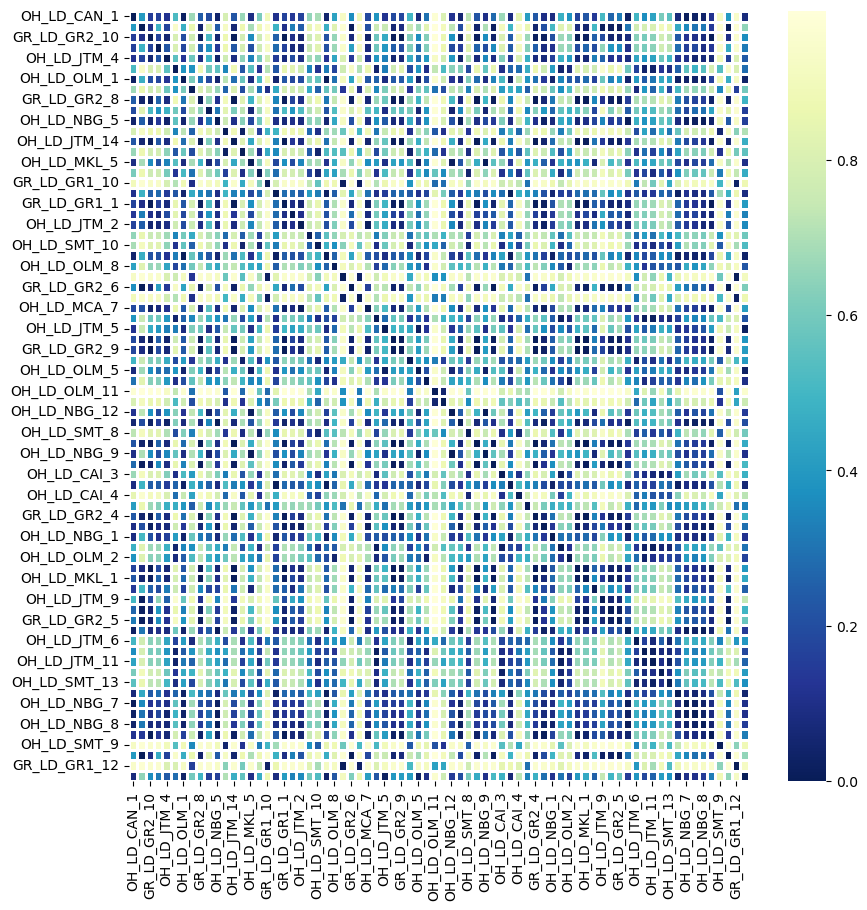

In [182]:
# plot it with seaborn
plt_heatmap(df_dist_pairwise)
# the darker, the similar

## Cluster based on Cosine similarity

In [183]:
# Elbows method to find optimal clusters
def find_n_cluster_by_elbow(df_dist_pairwise):
    cs = []
    plt.figure(figsize=(10,6))
    for i in range(1, 15):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(df_dist_pairwise)
        cs.append(kmeans.inertia_)
    plt.plot(range(1, 15), cs)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('CS')
    plt.show()

# it seems that 3 ~ 5 cluster are reasonable

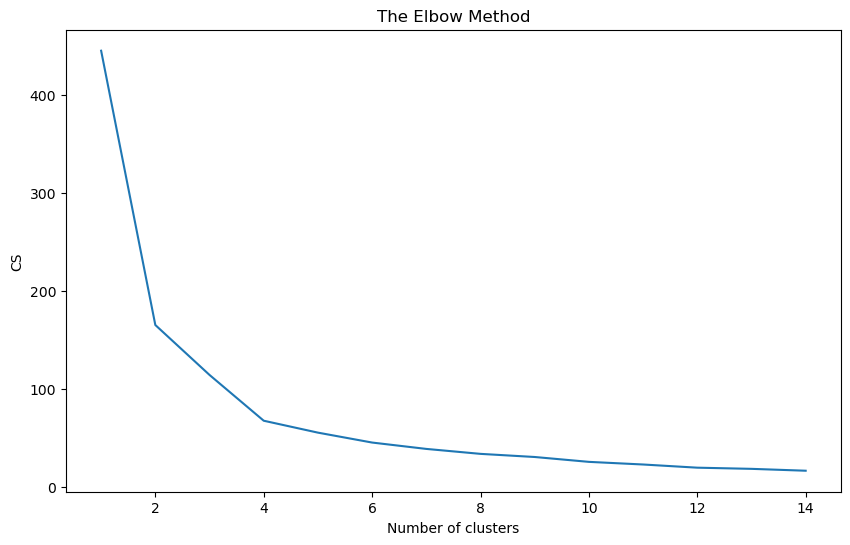

In [184]:
find_n_cluster_by_elbow(df_dist_pairwise)

### Kmeans cluster based on cosine similarity

In [185]:
def transform_by_PCA_plot(data, name):
    # transform the data to 2d to plot
    pca = PCA(2)

    #Transform the data
    transform = pca.fit_transform(data)

    #Initialize the class object
    kmeans = KMeans(n_clusters= 3)
    
    #predict the labels of clusters.
    label = kmeans.fit_predict(transform)
    
    #Getting unique labels
    u_labels = np.unique(label)
    print(label)
    print(u_labels)
    print("len(label): ", len(label))

    #plotting the results:
    plt.figure(figsize=(10,6))
    for i in u_labels:
        plt.scatter(transform[label == i , 0] , transform[label == i , 1] , label = i)
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
    plt.legend()
    # plt.savefig(name + '_cluster.png')
    plt.show()
    return label

## Note: pay more attendtion to the cluster itself, the number may change
## treat the left part as cluster 0, middle part as cluster 1, and right part as cluster 2, and check if the cluster make sense to you.

[2 0 0 0 2 1 2 1 0 2 2 1 0 1 2 1 1 2 0 0 0 1 1 2 1 1 0 1 0 1 2 0 0 1 2 1 1
 1 2 0 1 0 2 0 1 2 1 1 0 0 2 1 1 0 0 2 0 0 0 2 1 1 1 1 1 2 2 2 2 0 1 0 1 2]
[0 1 2]
len(label):  74


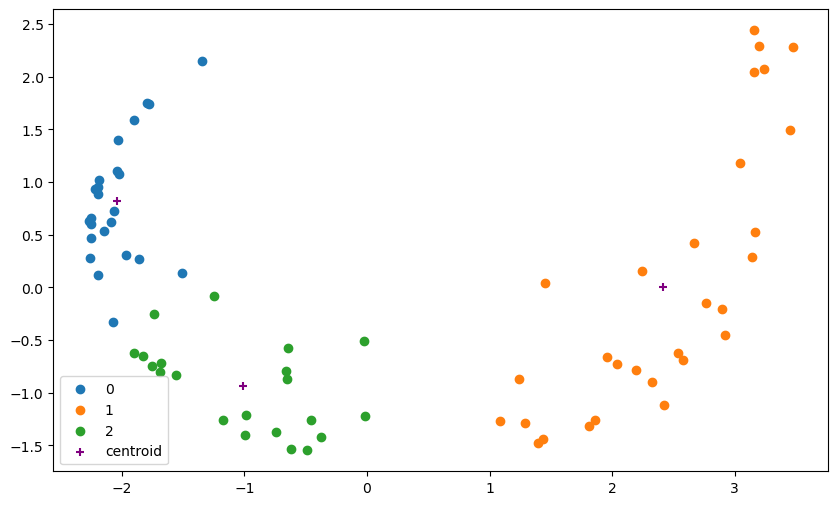

In [186]:
label = transform_by_PCA_plot(df_dist_pairwise, 'cos')
# the number may change but the cluster does not change

### Save the results from cos cluster

In [187]:
df_final = pd.DataFrame()
df_final.index = data_df_transposed.index

In [188]:
df_final['cos_cluster'] = label

In [189]:
df_final.head()

,cos_cluster
OH_LD_CAN_1,2
GR_LD_GR2_7,0
GR_LD_GR2_10,0
OH_LD_MCA_6,0
OH_LD_JTM_4,2


# Cluster by Jensen-Shannon Divergence

In [190]:
# same logic, but use Jensen-Shannon Divergence instead of cosine similarity
# calculate pairwise Jensen-Shannon Divergence
df_dist_pairwise_js = pd.DataFrame(
    squareform(pdist(data_df_transposed, metric='jensenshannon')),
    columns = data_df_transposed.index,
    index = data_df_transposed.index
)

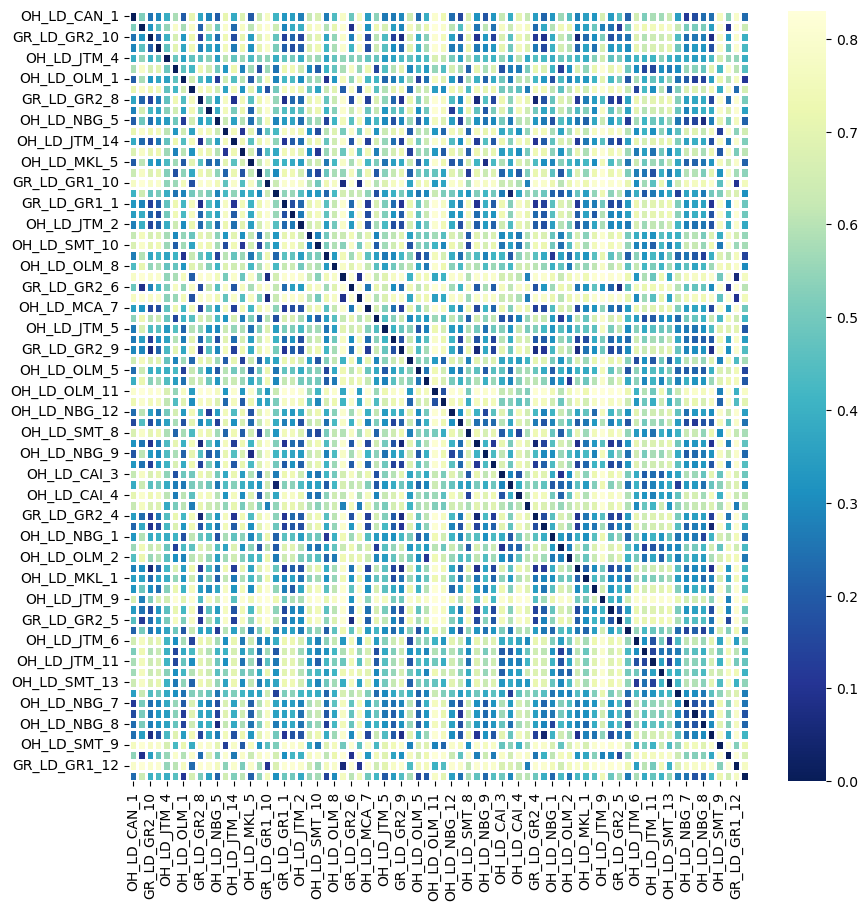

In [191]:
plt_heatmap(df_dist_pairwise_js)

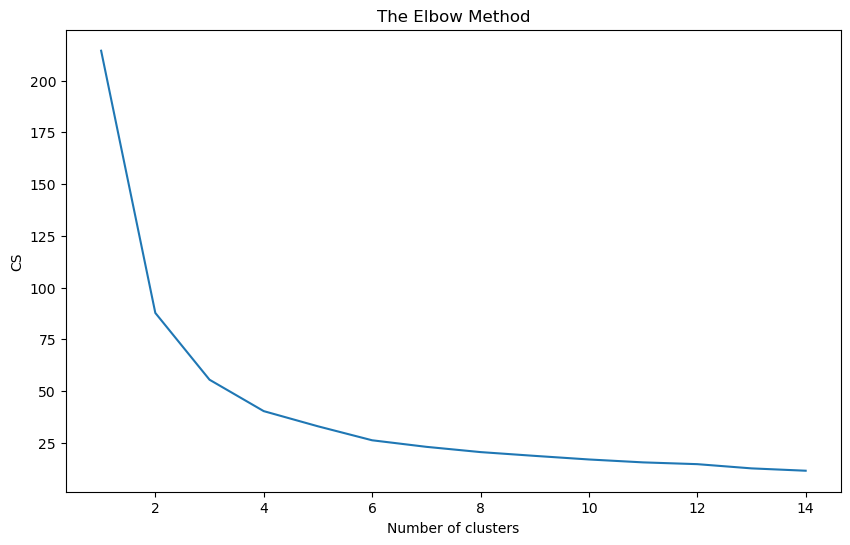

In [192]:
find_n_cluster_by_elbow(df_dist_pairwise_js)

[2 0 0 0 2 1 2 1 0 2 2 1 0 1 2 1 1 2 0 0 0 1 1 2 2 1 0 1 0 1 2 0 0 1 2 2 1
 1 2 2 1 0 2 0 1 2 1 1 0 0 2 1 2 0 2 0 0 0 0 2 1 1 1 1 1 2 2 2 2 0 1 0 1 2]
[0 1 2]
len(label):  74


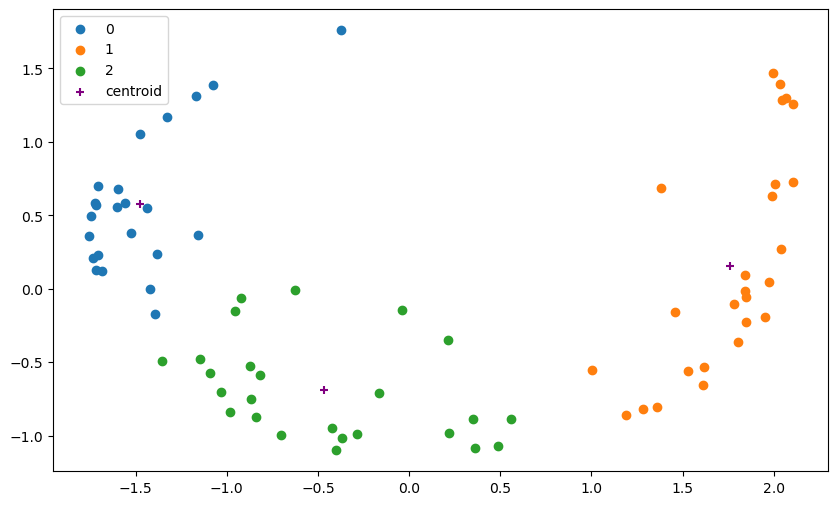

In [194]:
label = transform_by_PCA_plot(df_dist_pairwise_js, 'js')

### Save the results from Jensen-Shannon Divergence cluster

In [195]:
df_final['js_cluster'] = label

In [196]:
df_final.head()

,cos_cluster,js_cluster
OH_LD_CAN_1,2,2
GR_LD_GR2_7,0,0
GR_LD_GR2_10,0,0
OH_LD_MCA_6,0,0
OH_LD_JTM_4,2,2


## Cluster by wasserstein distance

In [197]:
# wasserstein distance
# use deepcopy!!!
df_dist_pairwise_wd = df_dist_pairwise.copy(deep = True)

In [198]:
from scipy.stats import wasserstein_distance
for mycol1 in data_df.columns:
    for mycol2 in data_df.columns:
        df_dist_pairwise_wd.loc[mycol1,mycol2] = wasserstein_distance(data_df[mycol1], data_df[mycol2])

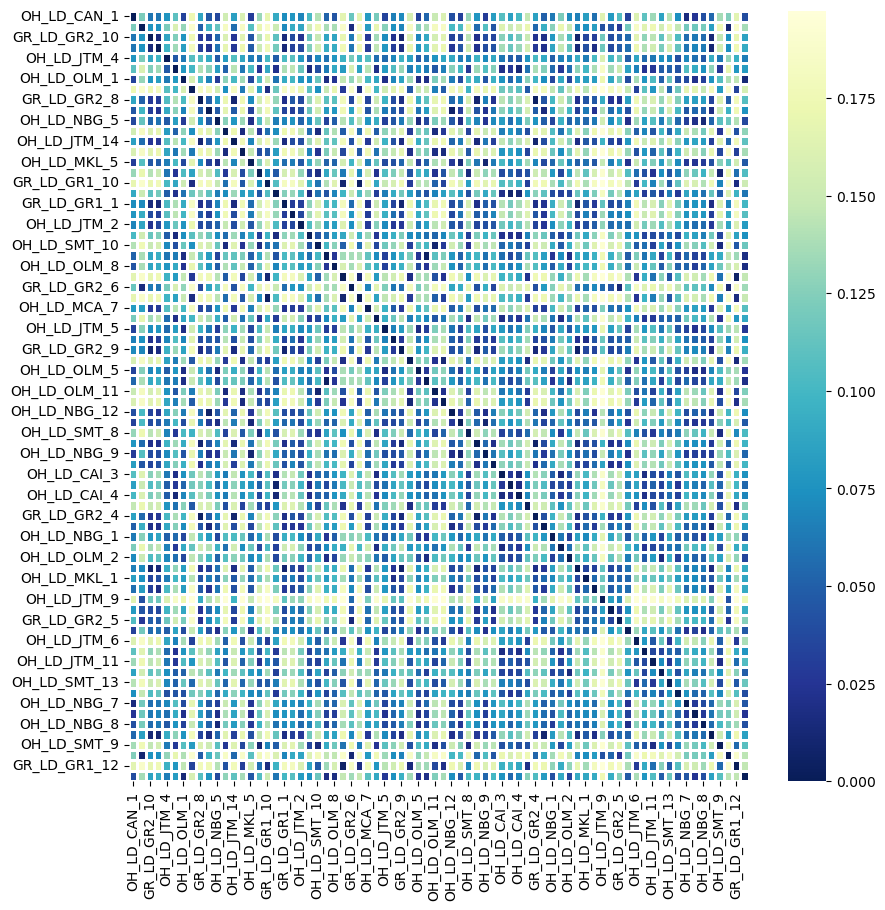

In [199]:
plt_heatmap(df_dist_pairwise_wd)

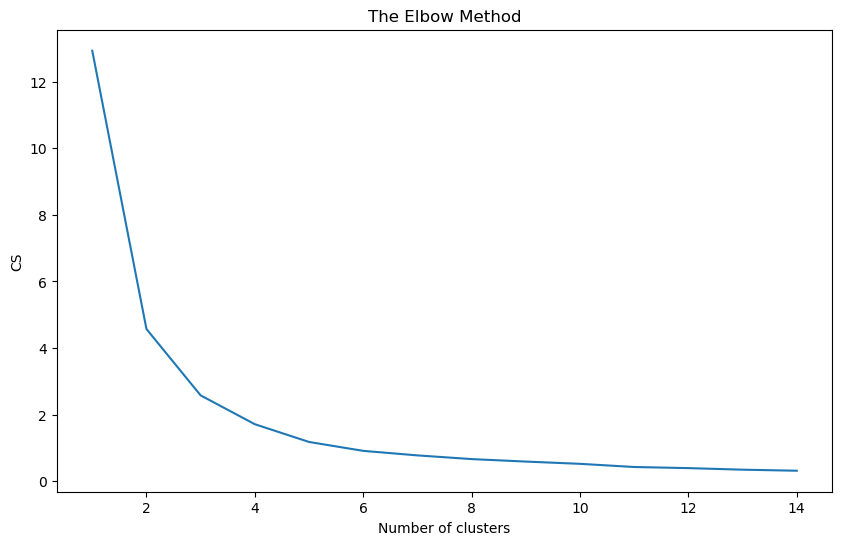

In [200]:
find_n_cluster_by_elbow(df_dist_pairwise_wd)
# 3 cluster seems to be the best!

[0 2 2 2 0 1 0 1 2 2 0 1 2 1 0 1 1 0 2 2 2 1 1 0 0 1 2 1 2 1 0 2 2 1 0 0 1
 1 2 0 1 2 0 2 1 0 1 1 2 2 0 1 0 2 2 2 2 2 2 0 1 1 1 0 1 0 0 0 0 2 1 2 1 0]
[0 1 2]
len(label):  74


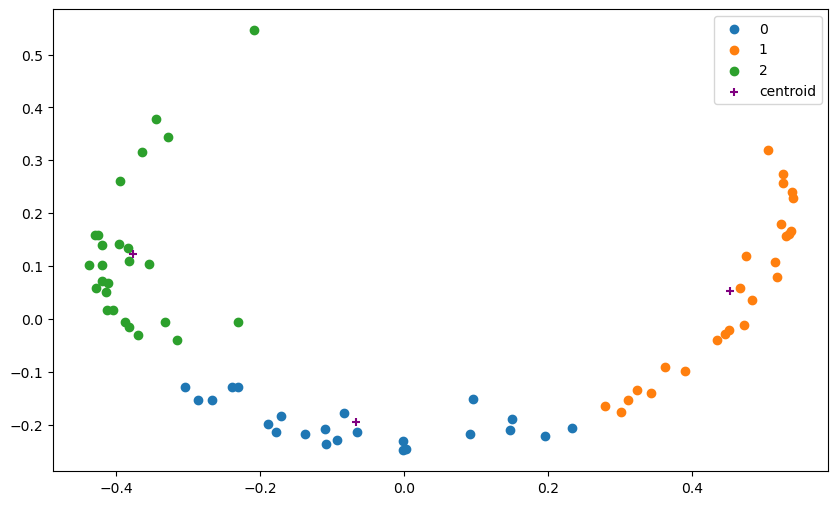

In [201]:
label = transform_by_PCA_plot(df_dist_pairwise_wd, 'wd')

### Save the results from wasserstein distance

In [202]:
df_final['wb_cluster'] = label

In [203]:
# do not care too much about the cluster number (0,1,2)
# pay more attendtion to the cluster itself!
df_final.to_csv('./cluster_res_CELRL_3_cluster.csv')

# Plot the data in each clusters

In [205]:
cluster_label = pd.read_csv('./res_back_up/cluster_res_CELRL_3_cluster.csv')

# cos_cluster

In [206]:
for i, f in enumerate(csv_files):
    print(f)

/Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_CAN_1_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/GR_LD_GR2_7_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/GR_LD_JTM_1_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/GR_LD_GR2_10_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_MCA_6_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_JTM_4_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_MKL_2_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_SMT_16_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_JTM_13_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_OLM_1_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/GR_LD_GR1_9_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/OH_LD_NBG_2_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/GR_LD_GR2_8_avg_max_min.csv
/Users/machaolun/Desktop/shoaling/data/CELRL/OH_

/var/folders/tg/j4sjjb0920dftqs1qb5pk9_00000gn/T/ipykernel_29172/4166872626.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  one_df = pd.read_csv(f)


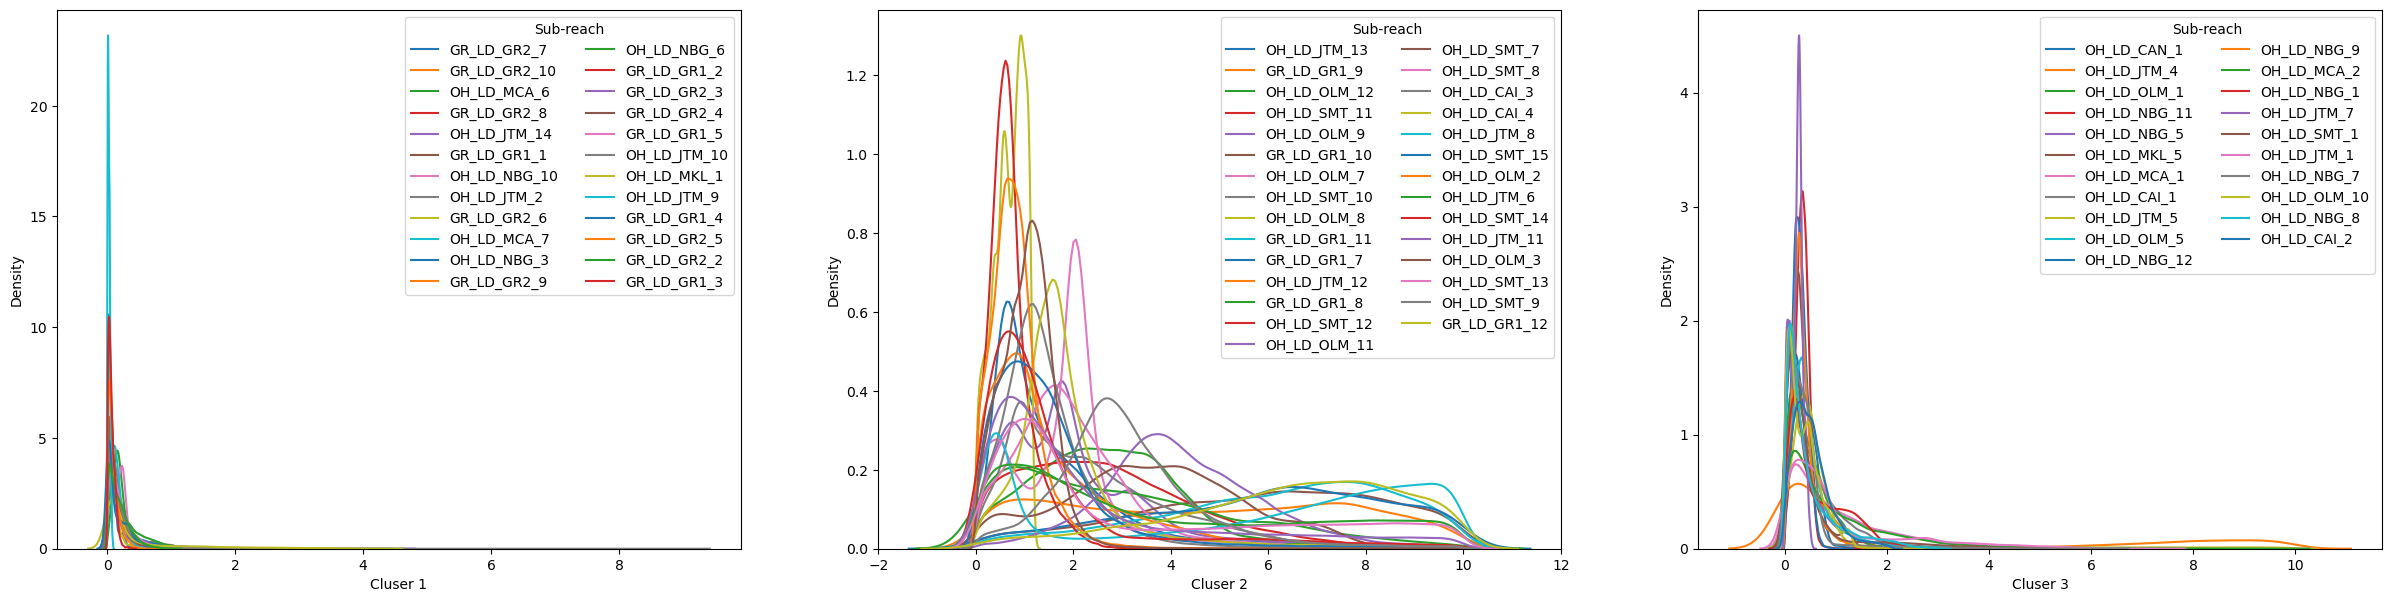

In [207]:
fig, axs = plt.subplots(1,3, figsize=(30, 7), facecolor='w', edgecolor='k')
# fig1.subplots_adjust(hspace = .5, wspace=.001)
# axs1 = axs1.ravel()

# fig2, axs2 = plt.subplots(7,6, figsize=(15, 15), facecolor='w', edgecolor='k')
# fig2.subplots_adjust(hspace = .5, wspace=.001)
# axs2 = axs2.ravel()

data_df = pd.DataFrame()

# loop over the list of csv files
for i, f in enumerate(csv_files):
    # read the csv file
    one_df = pd.read_csv(f)

    # print(f, one_df.columns)

    # with 0 and negative value
    # axs1[i - 1].hist(one_df['AvgRate_ftPerYr_Unfiltered'], bins = 10)
    # without 0 and negative value
    try:
        pro_data = one_df[(one_df['AvgRate_ftPerYr_Unfiltered'] > 0) & (one_df['AvgRate_ftPerYr_Unfiltered'] <10)]['AvgRate_ftPerYr_Unfiltered']
    except:
        pass
    # axs2[i - 1].hist(pro_data, bins = 10000)

    # hist, edges = locate_data_to_hist(pro_data)

    subreach_name = re.split('/|_avg_max_min.csv', f)[-2]


    if subreach_name in cluster_label[cluster_label['cos_cluster'] == 0]['subreach_name'].values:
        fig1 = sns.kdeplot(pro_data, ax = axs[0])
    elif subreach_name in cluster_label[cluster_label['cos_cluster'] == 1]['subreach_name'].values:
        fig2 = sns.kdeplot(pro_data, ax = axs[1])
    elif subreach_name in cluster_label[cluster_label['cos_cluster'] == 2]['subreach_name'].values:
        fig2 = sns.kdeplot(pro_data, ax = axs[2])
    # elif subreach_name in cluster_label[cluster_label['cos_cluster'] == 3]['subreach_name'].values:
    #     fig3 = sns.kdeplot(pro_data, ax = axs[3])
    # else:
    #     print(f)

axs[0].legend(title='Sub-reach', loc='upper right',ncol=2, labels=cluster_label[cluster_label['cos_cluster'] == 0]['subreach_name'].values)
axs[0].set(xlabel='Cluser 1')

axs[1].legend(title='Sub-reach', loc='upper right', ncol=2, labels=cluster_label[cluster_label['cos_cluster'] == 1]['subreach_name'].values)
axs[1].set(xlabel='Cluser 2')

axs[2].legend(title='Sub-reach', loc='upper right', ncol = 2, labels=cluster_label[cluster_label['cos_cluster'] == 2]['subreach_name'].values)
axs[2].set(xlabel='Cluser 3')

# axs[3].legend(title='Sub-reach', loc='upper right', ncol = 2, labels=cluster_label[cluster_label['cos_cluster'] == 3]['subreach_name'].values)
# axs[3].set(xlabel='Cluser 4')

plt.show()

# js_cluster

/var/folders/tg/j4sjjb0920dftqs1qb5pk9_00000gn/T/ipykernel_29172/231811946.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  one_df = pd.read_csv(f)


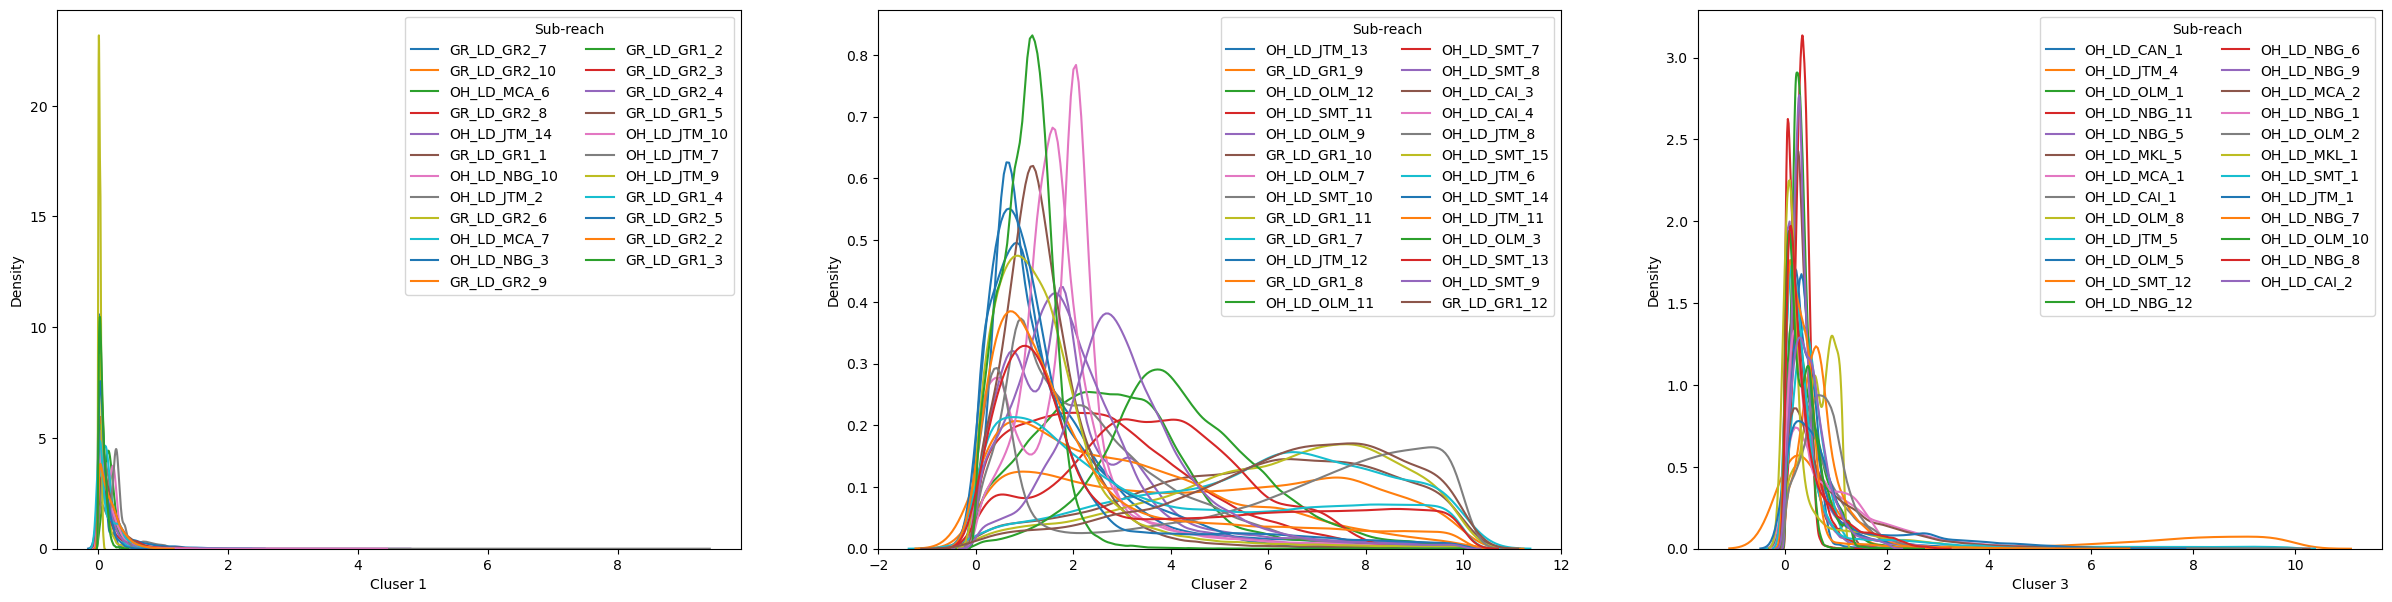

In [208]:
fig, axs = plt.subplots(1,3, figsize=(30, 7), facecolor='w', edgecolor='k')
# fig1.subplots_adjust(hspace = .5, wspace=.001)
# axs1 = axs1.ravel()

# fig2, axs2 = plt.subplots(7,6, figsize=(15, 15), facecolor='w', edgecolor='k')
# fig2.subplots_adjust(hspace = .5, wspace=.001)
# axs2 = axs2.ravel()

data_df = pd.DataFrame()

# loop over the list of csv files
for i, f in enumerate(csv_files):
    # read the csv file
    one_df = pd.read_csv(f)

    # print(f, one_df.columns)

    # with 0 and negative value
    # axs1[i - 1].hist(one_df['AvgRate_ftPerYr_Unfiltered'], bins = 10)
    # without 0 and negative value
    try:
        pro_data = one_df[(one_df['AvgRate_ftPerYr_Unfiltered'] > 0) & (one_df['AvgRate_ftPerYr_Unfiltered'] <10)]['AvgRate_ftPerYr_Unfiltered']
    except:
        pass
    # axs2[i - 1].hist(pro_data, bins = 10000)

    # hist, edges = locate_data_to_hist(pro_data)
    subreach_name = re.split('/|_avg_max_min.csv', f)[-2]
    if subreach_name in cluster_label[cluster_label['js_cluster'] == 0]['subreach_name'].values:
        fig1 = sns.kdeplot(pro_data, ax = axs[0])
    elif subreach_name in cluster_label[cluster_label['js_cluster'] == 1]['subreach_name'].values:
        fig2 = sns.kdeplot(pro_data, ax = axs[1])
    elif subreach_name in cluster_label[cluster_label['js_cluster'] == 2]['subreach_name'].values:
        fig3 = sns.kdeplot(pro_data, ax = axs[2])
    # elif subreach_name in cluster_label[cluster_label['js_cluster'] == 3]['subreach_name'].values:
    #     fig4 = sns.kdeplot(pro_data, ax = axs[3])

axs[0].legend(title='Sub-reach', loc='upper right', ncol=2, labels=cluster_label[cluster_label['js_cluster'] == 0]['subreach_name'].values)
axs[0].set(xlabel='Cluser 1')

axs[1].legend(title='Sub-reach', loc='upper right', ncol=2, labels=cluster_label[cluster_label['js_cluster'] == 1]['subreach_name'].values)
axs[1].set(xlabel='Cluser 2')

axs[2].legend(title='Sub-reach', loc='upper right', ncol=2, labels=cluster_label[cluster_label['js_cluster'] == 2]['subreach_name'].values)
axs[2].set(xlabel='Cluser 3')

# axs[3].legend(title='Sub-reach', loc='upper right', ncol=2, labels=cluster_label[cluster_label['js_cluster'] == 2]['subreach_name'].values)
# axs[3].set(xlabel='Cluser 4')

plt.show()

# wb_cluster

/var/folders/tg/j4sjjb0920dftqs1qb5pk9_00000gn/T/ipykernel_29172/4220197264.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  one_df = pd.read_csv(f)


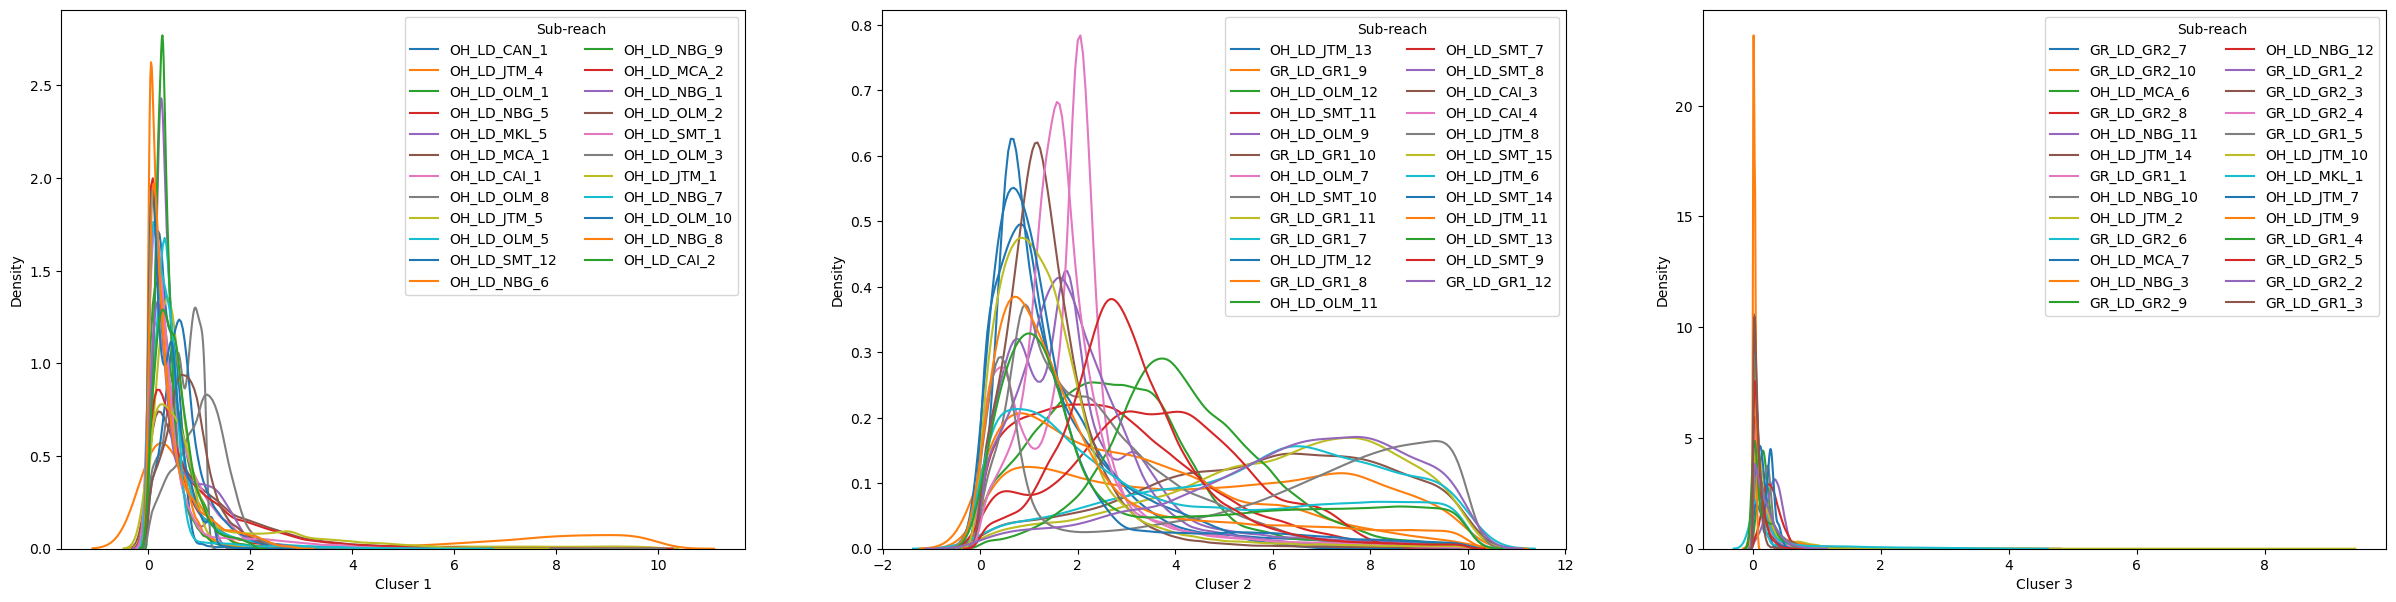

In [209]:
fig, axs = plt.subplots(1,3, figsize=(30, 7), facecolor='w', edgecolor='k')
# fig1.subplots_adjust(hspace = .5, wspace=.001)
# axs1 = axs1.ravel()

# fig2, axs2 = plt.subplots(7,6, figsize=(15, 15), facecolor='w', edgecolor='k')
# fig2.subplots_adjust(hspace = .5, wspace=.001)
# axs2 = axs2.ravel()
subreach_name in cluster_label[cluster_label['cos_cluster'] == 2]['subreach_name'].values
data_df = pd.DataFrame()

# loop over the list of csv files
for i, f in enumerate(csv_files):
    # read the csv file
    one_df = pd.read_csv(f)

    # print(f, one_df.columns)

    # with 0 and negative value
    # axs1[i - 1].hist(one_df['AvgRate_ftPerYr_Unfiltered'], bins = 10)
    # without 0 and negative value
    try:
        pro_data = one_df[(one_df['AvgRate_ftPerYr_Unfiltered'] > 0) & (one_df['AvgRate_ftPerYr_Unfiltered'] <10)]['AvgRate_ftPerYr_Unfiltered']
    except:
        pass
    # axs2[i - 1].hist(pro_data, bins = 10000)

    # hist, edges = locate_data_to_hist(pro_data)
    subreach_name = re.split('/|_avg_max_min.csv', f)[-2]
    if subreach_name in cluster_label[cluster_label['wb_cluster'] == 0]['subreach_name'].values:
        fig1 = sns.kdeplot(pro_data, ax = axs[0])
    elif subreach_name in cluster_label[cluster_label['wb_cluster'] == 1]['subreach_name'].values:
        fig2 = sns.kdeplot(pro_data, ax = axs[1])
    elif subreach_name in cluster_label[cluster_label['wb_cluster'] == 2]['subreach_name'].values:
        fig3 = sns.kdeplot(pro_data, ax = axs[2])
    # elif subreach_name in cluster_label[cluster_label['wb_cluster'] == 3]['subreach_name'].values:
    #     fig4 = sns.kdeplot(pro_data, ax = axs[3])

axs[0].legend(title='Sub-reach', loc='upper right',  ncol=2,labels=cluster_label[cluster_label['wb_cluster'] == 0]['subreach_name'].values)
axs[0].set(xlabel='Cluser 1')

axs[1].legend(title='Sub-reach', loc='upper right',  ncol=2,labels=cluster_label[cluster_label['wb_cluster'] == 1]['subreach_name'].values)
axs[1].set(xlabel='Cluser 2')

axs[2].legend(title='Sub-reach', loc='upper right',  ncol=2, labels=cluster_label[cluster_label['wb_cluster'] == 2]['subreach_name'].values)
axs[2].set(xlabel='Cluser 3')

# axs[3].legend(title='Sub-reach', loc='upper right', ncol=2, labels=cluster_label[cluster_label['wb_cluster'] == 2]['subreach_name'].values)
# axs[3].set(xlabel='Cluser 4')
plt.show()
